In [1]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PMLS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PMLS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\PMLS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [2]:
import spacy
spacy.cli.download("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [4]:
import pandas as pd
pd.set_option('display.max_colwidth',None)
try:
    df = pd.read_csv('goemotions.csv')
except FileNotFoundError:
    print("Error: 'goemotions.csv' not found.Make sure the file is in the same directory as the script")
print("First 5 rows of the dataset:")
display(df.head())


First 5 rows of the dataset:


,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,1.548381e+09,1,False,0,...,0,0,0,0,0,0,0,1,0,0
1,">sexuality shouldn’t be a grouping category It makes you different from othet ppl so imo it fits the definition of ""grouping""",eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,1.548084e+09,37,True,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,1.546428e+09,37,False,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,1.547965e+09,18,False,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Falcon.",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,1.546669e+09,2,False,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
df = df.rename(columns={"id": "comment_id"})
df = df[df["example_very_unclear"] == False]


In [6]:
print(df)

                                                                                                                                          text  \
0                                                                                                                              That game hurt.   
2                                                                                               You do right, if you don't care then fuck 'em!   
3                                                                                                                           Man I love reddit.   
4                                                                                         [NAME] was nowhere near them, he was by the Falcon.    
5      Right? Considering it’s such an important document, I should know the damned thing backwards and forwards... thanks again for the help!   
...                                                                                                                         

In [ ]:
# Cell 3: Generate simplified 'labels' as list
emotion_cols = [
    "admiration","amusement","anger","annoyance","approval","caring","confusion",
    "curiosity","desire","disappointment","disapproval","disgust","embarrassment",
    "excitement","fear","gratitude","grief","joy","love","nervousness","optimism",
    "pride","realization","relief","remorse","sadness","surprise","neutral"
]

# Assign labels as a list of emotion names for each row
def make_labels(row):
    return [emo for emo in emotion_cols if row[emo] == 1]

df["labels"] = df.apply(make_labels, axis=1)

# Remove rows that include 'neutral' in the labels
df = df[~df["labels"].apply(lambda x: "neutral" in x)]

# Define positive and negative emotion sets
pos = {"admiration","amusement","approval","caring","desire","excitement","gratitude","joy","love","optimism","pride","relief"}
neg = {"anger","annoyance","disappointment","disapproval","disgust","embarrassment","fear","grief","nervousness","remorse","sadness"}

# Map each row's labels to an overall sentiment
def map_sentiment(lbls):
    return "positive" if set(lbls) & pos else "negative"

df["sentiment"] = df["labels"].apply(map_sentiment)

# Drop comment_id and example_very_unclear columns
df = df[["text", "labels", "sentiment"]]


In [8]:
print(df)

                                                                                                                                          text  \
0                                                                                                                              That game hurt.   
3                                                                                                                           Man I love reddit.   
5      Right? Considering it’s such an important document, I should know the damned thing backwards and forwards... thanks again for the help!   
6                          He isn't as big, but he's still quite popular. I've heard the same thing about his content. Never watched him much.   
7          That's crazy; I went to a super [RELIGION] high school and I think I can remember 2 girls the entire 4 years that became teen moms.   
...                                                                                                                         

In [9]:
# Drop the 'labels' column and keep only 'text' and 'sentiment'
df = df[["text", "sentiment"]]


In [10]:
print(df)

                                                                                                                                          text  \
0                                                                                                                              That game hurt.   
3                                                                                                                           Man I love reddit.   
5      Right? Considering it’s such an important document, I should know the damned thing backwards and forwards... thanks again for the help!   
6                          He isn't as big, but he's still quite popular. I've heard the same thing about his content. Never watched him much.   
7          That's crazy; I went to a super [RELIGION] high school and I think I can remember 2 girls the entire 4 years that became teen moms.   
...                                                                                                                         

In [11]:
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 50448 entries, 0 to 69999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       50448 non-null  object
 1   sentiment  50448 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [12]:
print("\nSentiment Distribution:")
print(df['sentiment'].value_counts())


Sentiment Distribution:
sentiment
positive    27600
negative    22848
Name: count, dtype: int64


In [13]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [14]:
def preprocess_text(text):
    """
    Cleans and preprocesses a single text string.
    1. Removes HTML tags
    2. Lowercases text
    3. Removes punctuation and numbers
    4. Tokenizes text
    5. Removes stop words
    6. Lemmatizes words
    """
    text = re.sub(r'<.*?>', '', text)
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization is often better than stemming
    text = ' '.join(tokens)
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc]
    
    return ' '.join(lemmatized_tokens)

In [15]:
import re
from nltk.tokenize import word_tokenize
print("preprocessing all reviews .....")
df['cleaned_text'] = df['text'].apply(preprocess_text)
print("Preprcessing Complete!")
print("\nComparing Orignal vs Cleaned Text:")
display(df[['text','cleaned_text']].head())

preprocessing all reviews .....
Preprcessing Complete!

Comparing Orignal vs Cleaned Text:


,text,cleaned_text
0,That game hurt.,game hurt
3,Man I love reddit.,man love reddit
5,"Right? Considering it’s such an important document, I should know the damned thing backwards and forwards... thanks again for the help!",right consider important document know damned thing backwards forward thank help
6,"He isn't as big, but he's still quite popular. I've heard the same thing about his content. Never watched him much.",be not big he s still quite popular I ve hear thing content never watch much
7,That's crazy; I went to a super [RELIGION] high school and I think I can remember 2 girls the entire 4 years that became teen moms.,that s crazy go super religion high school think remember girl entire year become teen mom


In [16]:
from sklearn.model_selection import train_test_split
df['sentiment_numeric'] = df['sentiment'].map({'positive':1,'negative':0})
X = df['cleaned_text']
Y = df['sentiment_numeric']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)


print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 40358
Testing set size: 10090


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
# max_features=5000 means we only use the 5000 most common words, which is efficient
tfidf = TfidfVectorizer(max_features=10000)

# Fit the vectorizer on the training data and transform it
X_train_tfidf = tfidf.fit_transform(X_train)

# ONLY transform the test data using the already-fitted vectorizer
X_test_tfidf = tfidf.transform(X_test)

print(f"Shape of the training TF-IDF matrix: {X_train_tfidf.shape}")
print(f"Shape of the testing TF-IDF matrix: {X_test_tfidf.shape}")

Shape of the training TF-IDF matrix: (40358, 10000)
Shape of the testing TF-IDF matrix: (10090, 10000)


In [25]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
# solver='liblinear' is a good choice for this type of problem
model = LogisticRegression(solver='liblinear')
model.fit(X_train_tfidf, Y_train)

print("Model training complete!")

Model training complete!


In [26]:
def predict_sentiment(text):
    """
    Takes a raw text string and predicts its sentiment using the trained model.
    """
    # 1. Preprocess the text using the same function from Cell 2
    cleaned_comment = preprocess_text(text)
    
    # 2. Vectorize the text using the SAME fitted TF-IDF vectorizer from Cell 5
    vectorized_comment = tfidf.transform([cleaned_comment])
    
    # 3. Predict using the trained model from Cell 6
    prediction = model.predict(vectorized_comment)
    
    # 4. Return the human-readable result
    return 'Positive' if prediction[0] == 1 else 'Negative'

# --- Test Cases ---
comment_1 = "Thanks for the info mate gonna watch out next time"
comment_2 = "I just got a shirt made that says “I can’t have kids my dog is allergic"
comment_3 = "She wants to connect, alright. With your wallet."

print(f"Comment: '{comment_1}'\nPredicted Sentiment: {predict_sentiment(comment_1)}\n")
print(f"Comment: '{comment_2}'\nPredicted Sentiment: {predict_sentiment(comment_2)}\n")
print(f"Comment: '{comment_3}'\nPredicted Sentiment: {predict_sentiment(comment_3)}\n")

Comment: 'Thanks for the info mate gonna watch out next time'
Predicted Sentiment: Positive

Comment: 'I just got a shirt made that says “I can’t have kids my dog is allergic'
Predicted Sentiment: Negative

Comment: 'She wants to connect, alright. With your wallet.'
Predicted Sentiment: Negative



Model Accuracy: 0.7773

Classification Report:
              precision    recall  f1-score   support

    Negative       0.74      0.78      0.76      4570
    Positive       0.81      0.77      0.79      5520

    accuracy                           0.78     10090
   macro avg       0.78      0.78      0.78     10090
weighted avg       0.78      0.78      0.78     10090



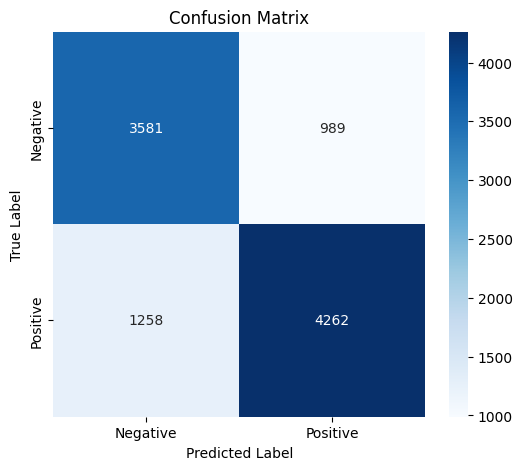

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Print the detailed classification report
print("\nClassification Report:")
print(classification_report(Y_test, y_pred, target_names=['Negative', 'Positive']))

# Plot the confusion matrix
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()